# Trabajo NLP
## Nombre: Jose Daniel Calderon Neyra

### Estructura



1.   Introducción y Justificación del Tema
2.   Datos
3.   Modelos a emplear
4.   Comparación
5.   Conclusiones


## Introducción y Justificación del tema

Los modelos de lenguaje natural se ha sumado en varios estudios para servir como una guia de inversión y soporte de estrategias financieras (Araci, 2019; Xing, 2024; Harish Bhat & Jain, 2024; entre otros). En ellos, se encuentran métricas de análisis de sentimiento basados en perspectivas positivas, negativas o neutras del mercado actual. Este trabajo se centra en el uso de FinBert (Araci, 2019), un modelo pre-entrenado con lenguaje financiero. Este modelo ofrece tres categorias: 0, que representa neutro; 1: positivo; y 2, negativo. Se evalua cómo este modelo reacciona a datos diarios de Bloomberg, relacionado a varios temas macrofinancieros.

## Datos
### ¿De dónde provienen?

Los datos fueron obtenidos de un RSS (Really Simple Syndication), que es una publicación,en este caso, de Bloomberg que representa un archivo XML. Estos datos se actualizan diariamente.
### ¿Qué representan?

Los datos se dividen en siete RSS relacionados a temas de economia, mercado, política, tecnología, riqueza industria y ambiente. Cada categoría tiene un número máximo de entradas que se va a actualizando.


*   Economía: 16
*   Mercado: 30
*   Política: 30
*   Tecnología: 8
*   Riqueza: 2
*   Industria: 9
*   Ambiente: 12

En total, se encontrarían 129 noticias. Sin embargo, puede pasar que una noticia esté en más de un tema. Por tanto, puede que el corpus sea menos dependiendo del día que se evalue.


## Tecnicas a utilizar:
1. BertTopic: un modelo de topic modeling que utiliza representaciones de texto generadas por modelos basados en transformers como BERT, RoBERTa o DistilBERT para identificar temas o tópicos dentro de grandes conjuntos de datos textuales. Se basa en la comprensión semántica del texto, permitiendo identificar temas de una manera más precisa y coherente.
2. FinBert: una variante de BERT diseñada específicamente para aplicaciones en el campo de las finanzas.

## Desarrollo

### Parte 1: Código de importación de corpus



Se requieren las librerias de feedparser y bertopic

In [1]:
!pip install feedparser

In [2]:
!pip install bertopic

In [3]:
import feedparser
# import delorean # librería descontinuada
import datetime
import requests
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Se importan las bases de datos en base a los RSS.
url_markets = "https://feeds.bloomberg.com/markets/news.rss"
url_tech = "https://feeds.bloomberg.com/technology/news.rss"
url_wealth = "https://feeds.bloomberg.com/wealth/news.rss"
url_pol = "https://feeds.bloomberg.com/politics/news.rss"
url_eco = "https://feeds.bloomberg.com/economics/news.rss"
url_ind = "https://feeds.bloomberg.com/industries/news.rss"
url_green = "https://feeds.bloomberg.com/green/news.rss"

# Se establecen las categorías establecidas por Bloomberg.

category = ["markets", "tech", "wealth", "pol", "eco", "ind", "green"]
# Se crea un diccionario que se va a llenar con cada categoría
newsFeed = {}

# Se realiza un loop que 'newsFeed' contenga todos los archivos XML.
for i, category in zip(range(7), ["markets", "tech", "wealth", "pol", "eco", "ind", "green"]):
  newsFeed[i] = feedparser.parse(f"url_{category}")

# newsFeed = [feedparser.parse(f"url_{category}") for category in ["markets", "tech", "wealth", "pol", "eco", "ind", "green"]]
# newsFeed = feedparser.parse(url_eco)

In [5]:
# Se hace un feed parser de cada un o por separado
newsFeed_1 = feedparser.parse(url_eco)
newsFeed_2 = feedparser.parse(url_markets)
newsFeed_3 = feedparser.parse(url_pol)
newsFeed_4 = feedparser.parse(url_tech)
newsFeed_5 = feedparser.parse(url_wealth)
newsFeed_6 = feedparser.parse(url_ind)
newsFeed_7 = feedparser.parse(url_green)

# Se crea una lista con cada XLM de cada sección de noticia.
nwsFeed = [newsFeed_1, newsFeed_2, newsFeed_3, newsFeed_4, newsFeed_5, newsFeed_6, newsFeed_7]

In [6]:
# Se crean resumenes de cada una de los tipos de noticia, considerando la lista de formatos XML, 'nwsFeed'
resumenes_1 = [entry.summary for entry in nwsFeed[0].entries]
resumenes_2 = [entry.summary for entry in nwsFeed[1].entries]
resumenes_3 = [entry.summary for entry in nwsFeed[2].entries]
resumenes_4 = [entry.summary for entry in nwsFeed[3].entries]
resumenes_5 = [entry.summary for entry in nwsFeed[4].entries]
resumenes_6 = [entry.summary for entry in nwsFeed[5].entries]
resumenes_7 = [entry.summary for entry in nwsFeed[6].entries]
print(len(resumenes_1), len(resumenes_2), len(resumenes_3), len(resumenes_4), len(resumenes_5), len(resumenes_6), len(resumenes_7))


20 30 30 8 2 8 14


In [7]:
# Evaluo el número de entradas (noticias) de cada una de las categorías de bloomberg.
for i in range(len(nwsFeed[5].entries)):
  print(nwsFeed[5].entries[i].summary)

Nio Inc. jumped the most in nearly five months Monday after unveiling a cash injection worth 13.3 billion yuan ($1.9 billion) from existing shareholders.
SpaceX launched a two-person crew to the International Space Station, the start of a mission to bring home two NASA astronauts stuck in orbit after flying on Boeing Co.’s Starliner spacecraft.
Floodwaters from Hurricane Helene have swamped a retired Duke Energy Corp. nuclear power plant, according to a filing with the Florida Department of Environmental Protection, though an escape of contaminated fuel appears unlikely.
UBS Group AG Chairman Colm Kelleher said he had underestimated the negative public response to Chief Executive Officer Sergio Ermotti’s 14.4 million Swiss franc ($17.1 million) pay package in 2023.
With road transportation accounting for about 15% of greenhouse gas emissions, it’s hard to see how the world will reach its net zero climate goals unless people give up their gasoline and diesel cars.
The board of Petroleos

In [8]:
np.max(len(nwsFeed[1].entries))

30

In [26]:
# Se guarda el resumen de cada noticia.
resumenes = {}

# Se emplea un condicional para asegurar que ninguno de los 'keys' del diccionario se repita
for i in list(range(len(nwsFeed))):
  for j, entry in zip(range(len(nwsFeed[i].entries)),nwsFeed[i].entries):
    if i == 0:
       resumenes[j] = entry.summary
    else:
      resumenes[j+(i)*np.max(len(nwsFeed[i-1].entries))] = entry.summary

In [28]:
len(resumenes.keys())

98

In [29]:
# Se obtiene obtiene una lista de los outputs
l = resumenes.keys()
resumenes = list(map(resumenes.get, l))

In [30]:
# Se considera una nueva lista que se apendea si la noticia no se ha incorporado anteriormente en la anterior iteración.
unique_resumenes = []
[unique_resumenes.append(resumen) for resumen in resumenes if resumen not in unique_resumenes]
print(len(unique_resumenes))


86


## Parte 2: Código de despliegue de modelo

In [13]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn.functional import softmax

In [14]:
# Inicializar el modelo de BERT en transformers.
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
sentence_model = SentenceTransformer("distiluse-base-multilingual-cased-v1")

In [15]:
# Inicializar y entrenar el modelo BERTopic
# Creamos una instancia del modelo BERTopic utilizando un modelo de embeddings basado en transformers (por ejemplo, BERT).
# El parámetro embedding_model indica el modelo de embeddings que convierte los textos en vectores.
# min_topic_size se establece en 2 para permitir que los temas identificados tengan un tamaño mínimo de 2 documentos, permitiendo temas más pequeños.
topic_model = BERTopic(embedding_model=sentence_model, min_topic_size=2)

# Entrenamos el modelo con los resúmenes únicos. El método fit_transform devuelve una lista 'topics' con el tema asignado a cada documento.
# El segundo valor que devuelve el método fit_transform lo descartamos con el símbolo de guion bajo (_).
topics, _ = topic_model.fit_transform(unique_resumenes)

# Obtener los temas más representativos
# La función get_topic_info() nos da un resumen de los temas encontrados. Esta tabla incluye el número del tema, su frecuencia y las palabras clave más relevantes para cada tema.
print(topic_model.get_topic_info())

# Obtener el número total de temas
# Aquí estamos calculando cuántos temas fueron generados en total. La función get_topic_info() nos devuelve una lista de tópicos y, con len(), obtenemos la cantidad de elementos en esa lista.
num_topics = len(topic_model.get_topic_info())
print(f"Number of topics: {num_topics}")

# Visualizar los temas más representativos
# Visualizamos los 5 teemas más importantes en una representación gráfica. Esta visualización interactiva permite explorar las relaciones y distancias entre los diferentes temas identificados.
topic_model.visualize_topics(top_n_topics=5)

# Para ver las palabras más relevantes de un tópico específico (por ejemplo, el tema 0)
# La función get_topic() devuelve las palabras clave más representativas de una categoría en particular. En este caso, mostramos las palabras del tema 0.
print(topic_model.get_topic(0))

# Para ver en qué tema se clasifica cada titular (resumen)
# Recorremos la lista de resúmenes (resumenes) con enumerate() para obtener tanto el índice como el resumen.
# Usamos topics[i] para acceder al tema asignado a cada resumen y lo imprimimos junto con el texto original del resumen.
# Solo mostramos los primeros 10 resúmenes para mantener el ejemplo corto.
for i, headline in enumerate(resumenes):
    print(f"Titular: {headline}")
    print(f"Tópico: {topics[i]}")
    print("---")


    Topic  Count                                 Name  \
0      -1     15                     -1_of_the_to_and   
1       0     18                   0_the_party_of_for   
2       1     14                      1_and_the_as_at   
3       2      7     2_in_and_artificial_intelligence   
4       3      7                  3_chinese_to_in_the   
5       4      6                 4_budget_the_to_2025   
6       5      6            5_japanese_over_after_inc   
7       6      4       6_interest_the_reserve_federal   
8       7      4  7_hezbollah_leader_hassan_nasrallah   
9       8      3                8_iran_israel_it_said   
10      9      2    9_ringgit_stronger_relying_bounce   

                                       Representation  \
0   [of, the, to, and, chief, biggest, in, for, it...   
1   [the, party, of, for, on, to, minister, trump,...   
2   [and, the, as, at, nbsp, people, hurricane, he...   
3   [in, and, artificial, intelligence, bloomberg,...   
4   [chinese, to, in, the, mos

In [16]:
import pandas as pd
df = pd.DataFrame({'text': unique_resumenes, 'topic': topics})
df.head()
df.sort_values(by='topic')

,text,topic
76,Meta’s latest AR glasses and cheaper mixed-rea...,-1
15,The board of Petroleos Mexicanos is set to con...,-1
18,Britons are indulging in small mood boosters a...,-1
32,Iron ore spiked almost 11% after three of Chin...,-1
77,French football star Kylian Mbappe has acquire...,-1
...,...,...
61,Ukraine said it struck a stockpile of weapons ...,8
60,US Defense Secretary Lloyd Austin warned Iran ...,8
57,Israeli fighter jets bombed a seaport and seve...,8
34,Singapore’s stagnant initial public offering m...,9


In [36]:
frec = [topics.count(i) for i in range(-1,10)]

<BarContainer object of 11 artists>

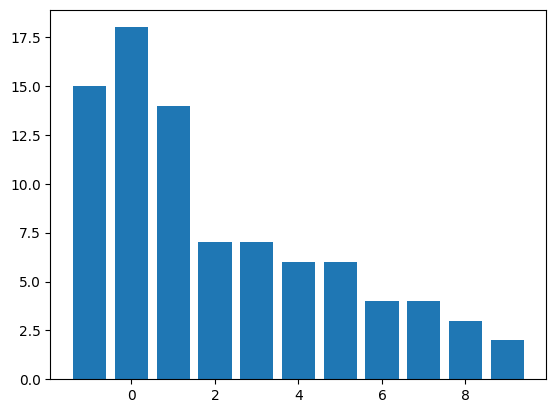

In [37]:
# Hacemos una gráfica de barras para ver cuál es la categoría moda.
fig, ax = plt.subplots()
ax.bar([-1,0,1,2,3,4,5,6,7,8,9], frec)

In [19]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Cargar el tokenizador y el modelo FinBERT para clasificación
tokenizer = BertTokenizer.from_pretrained("yiyanghkust/finbert-tone")
model = BertForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")

In [20]:
def analizar_sentimiento(texto):
    # Tokenizar el texto
    inputs = tokenizer(texto, return_tensors="pt", truncation=True, padding=True, max_length=512)

    # Realizar la inferencia
    with torch.no_grad():
        outputs = model(**inputs)

    # Obtener las probabilidades
    probs = softmax(outputs.logits, dim=1)

    # El modelo está entrenado para 5 clases: de 1 estrella (muy negativo) a 5 estrellas (muy positivo)
    sentimiento = torch.argmax(probs).item() + 1

    return sentimiento, probs.squeeze().tolist()

In [21]:
for texto in unique_resumenes:
    sentimiento, probs = analizar_sentimiento(texto)
    print(f"Texto: {texto}")
    print(f"Sentimiento: {sentimiento} estrellas")
    print(f"Probabilidades: {probs}")
    print()

for texto in unique_resumenes:
    sentimiento, probs = analizar_sentimiento(texto)
    if sentimiento == '1 estrella':
        print(f"Texto: {texto}")
        print(f"Sentimiento: {sentimiento}")
        print(f"Probabilidades: {probs}")
        print()


Texto: Thailand Prime Minister Paetongtarn Shinawatra’s popularity surged in the latest survey as the new government approved its version of a cash handout program.
Sentimiento: 2 estrellas
Probabilidades: [8.700770558789372e-05, 0.9999085664749146, 4.454158897715388e-06]

Texto: Japan’s next prime minister, Shigeru Ishiba, is set to name party veterans to senior posts in his cabinet as he broadly pursues continuity in economic, monetary and foreign policy, and prepares for an expected early general election.
Sentimiento: 1 estrellas
Probabilidades: [0.9999966621398926, 8.360894980796729e-07, 2.4977332486741943e-06]

Texto: China’s factory activity contracted for a fifth straight month in September, a further sign of economic weakness that highlights the urgency for Beijing’s stimulus blitz.
Sentimiento: 3 estrellas
Probabilidades: [2.055896766250953e-05, 8.616716513643041e-05, 0.999893307685852]

Texto: Key industry and government officials are urging US dockworkers and their employer

In [23]:
# Contamos la cantidad de positivos, negativos y neutros
count_pos = 0
count_neg = 0
count_neu = 0

for texto in unique_resumenes:
    sentimiento, probs = analizar_sentimiento(texto)
    if sentimiento == 1:
        count_pos += 1
    elif sentimiento == 2:
        count_neg += 1
    else:
        count_neu += 1



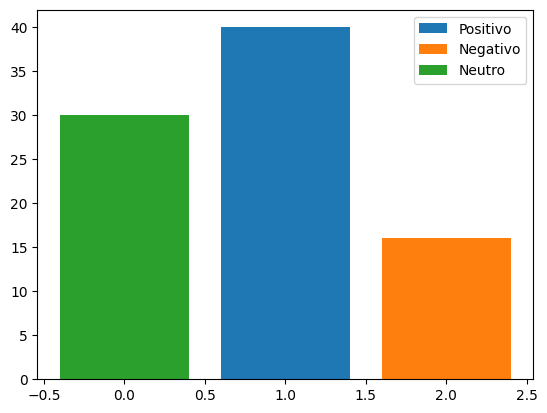

In [24]:
frec = [count_pos, count_neg, count_neu]
fig, ax = plt.subplots()
ax.bar(1, frec[0], label = 'Positivo')
ax.bar(2, frec[1], label = 'Negativo')
ax.bar(0, frec[2], label = 'Neutro')


ax.legend()


# Conclusiones

Respecto al resultado de Bertopic, se encuentran 11 categorías establecidas de manera arbitraria por el modelo, las categorías parecen indicar distinción entre noticias de guerra y de política económica. Sin embargo, no se encuentra una justificación aparente para que sean 11 categorías.Respecto al resultado de FinBert, se han obtenido resultados de view positivo sobre negativo y neutro en el mercado. Es decir, la perspecta de crecimiento económico y financiero actualmente es positiva.  
Un siguiente paso a realizar por el autor es focalizar a noticias dentro de una región para obtener una perspectiva más centrada en una región más específica. Además, se pueden emplear modelos más sofisticados. Finalmente, se puede emplear para apoyar un modelo a partir de Retrieve Augmented Generation, que es una herramienta que apoya en el conocimiento específico de un LLM.

## Bibliografia


1. Araci, D. (2019). FinBERT: Financial Sentiment Analysis with Pre-trained Language Models. arXiv preprint arXiv:1908.10063.
2. Bhat, R., & Jain, B. (2024, June). Stock Price Trend Prediction using Emotion Analysis of Financial Headlines with Distilled LLM Model. In Proceedings of the 17th International Conference on PErvasive Technologies Related to Assistive Environments (pp. 67-73).
3. Xing, F. (2024). Designing heterogeneous llm agents for financial sentiment analysis. ACM Transactions on Management Information Systems.